In [2]:
# execute to import notebook styling for tables and width etc.
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen('https://raw.githubusercontent.com/DataScienceUWL/DS775v2/master/ds755.css')
HTML(response.read().decode("utf-8"));

In [3]:
# imports
%matplotlib notebook
import numpy as np
from scipy import interpolate
from scipy.optimize import minimize_scalar, minimize
import babel.numbers as numbers
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import json
import time
import seaborn as sns
sns.set_style("darkgrid")

#  <font color = "blue">Self Assessment:  Minimize to Maximize</font>

In [4]:
P = lambda x: -0.008 * x**2 + 3.1 * x - 80  # lambda is for writing one line functions
neg_P = lambda x: -P(x)
result = minimize(neg_P, x0=150, bounds=[(0, 250)])
print(
    'The maximum profit is ${:6.2f} and occurs when {:3.2f} apartments are rented.'
    .format(-1000 * result.fun[0], result.x[0]))

The maximum profit is $220312.50 and occurs when 193.75 apartments are rented.


193.75 is the relaxed solution, but we can't rent 193.75 apartments.  Let's check 193 and 194 to see which yields a larger profit.

In [5]:
P(193),P(194)

(220.30800000000005, 220.31199999999995)

Bottom line:  rent 194 apartments for profit $220,312.

# <font color = "blue">Self Assessment:  Finding Multiple Extrema</font>

<IPython.core.display.Javascript object>


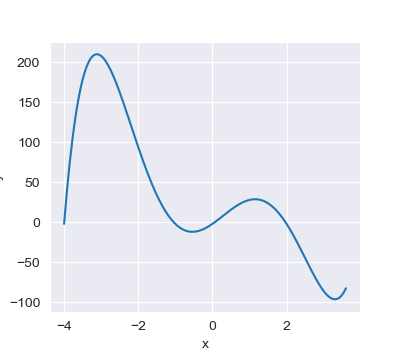

In [6]:
# graph of profit function
x = np.linspace(-4,3.6,201)
f = lambda x:x**5-x**4-18*x**3+16*x**2+32*x-2
fig = plt.figure(figsize=(4,3.5));
plt.plot(x,f(x));
plt.xlabel('x');
plt.ylabel('y');

There appear to be local maxima around $x=-3$ and $x=1$ while there appear to be local minima around $x=-0.5$ and $x = 3.5$.

In [1]:
# find minima first
x0_min = [-.5,3.5]
for x0 in x0_min:
    result = minimize(f,x0)
    print('There is a local minimum value of {:3.2f} at x = {:1.2f}'.format(result.fun[0],result.x[0]))
    
# now maxima
neg_f = lambda x:-f(x)
x0_max = [-3,1]
for x0 in x0_max:
    result = minimize(neg_f,x0)
    print('There is a local maximum value of {:3.2f} at x = {:1.2f}'.format(-result.fun,result.x[0]))

NameError: name 'minimize' is not defined

# <font color="blue">Self-Assessment: Rastrigin with dim = 3, dim = 4</font>

How many iterations does it take to reliably find the global minimum with dim = 3?  With dim = 4?  Use the multi-start strategy.

In [11]:
def rastrigin(x):
    # pass a single vector of length n (=dim) to evaluate Rastrigin
    return sum(x**2 + 10 - 10 * np.cos(2 * np.pi * x))

The more local searches we perform, the better the probability of locating the global minimum at the origin.  Experiment with the number of local searches to see how the reliability increases.  It turns out that with dim = 3 it takes about 2000 local searches to have a 90% chance at finding the global minimum.  For dim = 4 it takes about 20000 local searches.

It's possible to arrive at these numbers mathematically, but we just want you to get an idea that the number of local searches required increases dramatically as the dimension increases.

In [44]:
def multistart_rastrigin(dim,num_local_searches):
    minima = np.zeros(num_local_searches)
    for i in range(num_local_searches):
        x_initial = np.random.uniform(-5.12, 5.12, dim)
        result = minimize(rastrigin, x_initial)
        minima[i] = result.fun
    return minima

dim = 3
num_local_searches = 2000
min_values = multistart_rastrigin(dim,num_local_searches)
successes = sum( min_values < .01)
print('The global minimum was found {:d} times'.format(successes) )

The global minimum was found 4 times


# <font color = "blue">Self-Assessment:  Rastrigin with dim = 10 </font>

Do 1000 local search with Rastrigin with dim = 10.  What is the smallest value you find?  How long do you think it would take to find the minimum from randomly chosen initial points like this?  

In [53]:
dim = 10
num_local_searches = 1000
min_values = multistart_rastrigin(dim,num_local_searches)
print('The smallest minimum value found is {:3.2f}'.format(np.min(min_values)))

The smallest minimum value found is 15.92


With 1000 local searches the minimum value seems to be about 16 to 20.  Increasing to 10000 local searches gave a minimum value of about 14.  It's not clear yet how many iterations to use, but it's likely a lot!

# <font color="blue">Self-Assessment:  How many searches?</font>

We'll start by writing a function that repeats the local search process until the global minimum is found and returns the total number of local searches.

In [ ]:
def repeat_until_found(dim):
    best_value = 1.e10
    iterations = 0
    while best_value > 0.01:
        iterations += 1
        x_initial = np.random.uniform(-5.12, 5.12, dim)
        result = minimize(rastrigin, x_initial)
        if result.fun < best_value:
            best_value = result.fun
    return(iterations)

repeat_until_found(1)

Now we do this 100 times for each of dim = 1,2,3 and gather the results.  This code may take several minutes to run.

In [60]:
num_trials = 100
dims = np.array([1,2,3])
iterations = np.zeros((num_trials,len(dims)))
for i in range(num_trials):
    for j in range(len(dims)):
        iterations[i,j] = repeat_until_found(dims[j])

In [61]:
average_iterations = np.mean(iterations, axis=0)
for j in range(len(dims)):
    print(
        'In dimension {:d} it takes {:3.1f} local searches, on average, to find the global min.'
        .format(dims[j], average_iterations[j]))

In dimension 1 it takes 6.7 local searches, on average, to find the global min.
In dimension 2 it takes 97.7 local searches, on average, to find the global min.
In dimension 3 it takes 751.8 local searches, on average, to find the global min.


The number of searches increases roughly by an order of magnitude (power of 10) for each added dimension.

# <font color = "blue">Self Assessment: How many searches when dim = 10?</font>

Approximately now many local searches are required to find the global minimum one time when dim = 10?  Is it surprising that you (very likely) didn't find it with 1000 local searches?  Explain

The number of searches would be approximately $(10.28)^{10}$ or

In [63]:
numbers.format_decimal(10.28**10, locale='en_US')

'13,180,477,576.06'

That's about 13 billion local searches.  Even if we did 10,000 local searches per second, it would still take about two weeks to do enough to find the global minimum once:

In [68]:
# number of weeks to do local searches at 10,000 per second
(10.28**10)/10000/3600/24/7

2.179311768528369

Fortunately there are better approaches that can often deliver results in much less time!

# <font color = "blue"> Self Assessment: Gerrymandering Local Search</font>

In [69]:
# imports
import pandas as pd 
import numpy as np

In [83]:
# load the data + random assignment
num_districts = 10
min_voters_in_district = 150
max_voters_in_district = 350

dems = [
    152, 81, 75, 34, 62, 38, 48, 74, 98, 66, 83, 86, 72, 28, 112, 45, 93, 72
]
reps = [62, 59, 83, 52, 87, 87, 69, 49, 62, 72, 75, 82, 83, 53, 98, 82, 68, 98]
cities = pd.DataFrame(data={'dems': dems, 'reps': reps})


def summarize_districts(assign, cities):
    reps = np.zeros(num_districts, dtype=np.int32)
    dems = np.zeros(num_districts, dtype=np.int32)
    df = cities.groupby(assign).sum()
    reps[df.index] = df['reps']
    dems[df.index] = df['dems']
    total = reps + dems
    delta = np.minimum(np.maximum(total, min_voters_in_district),
                       max_voters_in_district) - total
    rep_win = reps > dems
    dict = {'reps': reps, 'dems': dems, 'total': total, 'rep_win': rep_win}
    return (pd.DataFrame(data=dict))


def fitness_districts(assign, cities):
    df = cities.groupby(assign).sum()
    fitness = sum(df['reps'] > df['dems'])
    total_voters = np.zeros(num_districts, dtype=np.int32)
    total_voters[df.index] = df.sum(axis=1)
    fitness -= np.abs(
        np.minimum(np.maximum(total_voters, 150), 350) - total_voters).sum()
    return (fitness)


def gerrymandering_search(cities, num_districts, max_no_improve):
    # random hill climbing
    max_moves_no_improve = 1000

    num_cities = cities.shape[0]
    current_districts = np.random.randint(low=0,
                                          high=num_districts,
                                          size=num_cities)
    current_fitness = fitness_districts(current_districts, cities)

    num_moves_no_improve = 0
    while (num_moves_no_improve < max_moves_no_improve):
        num_moves_no_improve += 1
        new_districts = current_districts.copy()
        # randomly choose a city and assign it to a random district
        new_districts[np.random.randint(num_cities)] = np.random.randint(
            num_districts)
        new_fitness = fitness_districts(new_districts, cities)
        if new_fitness > current_fitness:
            current_fitness = new_fitness
            current_districts = new_districts
            num_moves_no_improve = 0
    return current_fitness, current_districts


fitness, districts = gerrymandering_search(cities, 10, 1000)

print('Best Fitness Value: {}'.format(fitness))
summarize_districts(districts, cities)

Best Fitness Value: 7


,reps,dems,total,rep_win
0,185,150,335,True
1,143,176,319,False
2,62,152,214,False
3,167,160,327,True
4,83,72,155,True
5,180,158,338,True
6,151,93,244,True
7,108,155,263,False
8,159,128,287,True
9,83,75,158,True


In [87]:
best_fitness = -1000
for i in range(100):
    fitness,districts = gerrymandering_search(cities,10,1000)
    if fitness > best_fitness:
        best_fitness = fitness
        best_districts = districts
summarize_districts(best_districts,cities)

,reps,dems,total,rep_win
0,149,136,285,True
1,154,152,306,True
2,144,131,275,True
3,112,109,221,True
4,150,146,296,True
5,111,226,337,False
6,170,134,304,True
7,83,75,158,True
8,98,72,170,True
9,150,138,288,True
